PLANT DISEASE DETECTION


Adding the Dataset 
Dataset Link : https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?select=New+Plant+Diseases+Dataset%28Augmented%29

Importing the libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

DATA PREPROCESSING


Training Image Preprocessing

In [30]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128,128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 70295 files belonging to 38 classes.


  
Validation Image Preprocessing

In [31]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.




BUILDING THE MODEL 

In [32]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [39]:
cnn.add(tf.keras.layers.Flatten())

In [40]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [41]:
cnn.add(tf.keras.layers.Dropout(0.4)) #TO AVOID OVERFITTING

In [42]:
#OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))



Compiling and Training

In [43]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1186s 538ms/step - accuracy: 0.4169 - loss: 2.0600 - val_accuracy: 0.8599 - val_loss: 0.4465
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1183s 539ms/step - accuracy: 0.8505 - loss: 0.4695 - val_accuracy: 0.9115 - val_loss: 0.2653
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1216s 554ms/step - accuracy: 0.9116 - loss: 0.2754 - val_accuracy: 0.9296 - val_loss: 0.2131
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1261s 574ms/step - accuracy: 0.9392 - loss: 0.1843 - val_accuracy: 0.9416 - val_loss: 0.1803
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1249s 568ms/step - accuracy: 0.9545 - loss: 0.1346 - val_accuracy: 0.9516 - val_loss: 0.1547
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1236s 563ms/step - accuracy: 0.9643 - loss: 0.1092 - val_accuracy: 0.9461 - val_loss: 0.1789
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1220s 555ms/step - accuracy: 0.9716 - loss: 0.0848 - val_accuracy: 0.9516 - val_loss: 0.1594
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1196s 544ms/s



MODEL EVALUATION 

In [46]:
#TRAINING SET ACCURACY
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 604s 275ms/step - accuracy: 0.9844 - loss: 0.0433
Training accuracy: 0.9854897260665894


In [47]:
#VALIDATION SET ACCURACY
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 147s 267ms/step - accuracy: 0.9606 - loss: 0.1374
Validation accuracy: 0.9606760740280151



SAVING THE MODEL

In [48]:
cnn.save('trained_plant_disease_model.keras')

In [49]:
training_history.history #RETURN DICTIONARY OF HISTORY

{'accuracy': [0.621082603931427,
  0.871569812297821,
  0.9178746938705444,
  0.9435663819313049,
  0.9570524096488953,
  0.9663987755775452,
  0.9722313284873962,
  0.9766128659248352,
  0.9788747429847717,
  0.9827299118041992],
 'loss': [1.2836577892303467,
  0.40455058217048645,
  0.2528163492679596,
  0.17440730333328247,
  0.12939991056919098,
  0.10275042057037354,
  0.08356045931577682,
  0.07041782885789871,
  0.06354478746652603,
  0.0527774952352047],
 'val_accuracy': [0.8599476218223572,
  0.9114500284194946,
  0.9296039342880249,
  0.941611647605896,
  0.9516276121139526,
  0.9461074471473694,
  0.9516276121139526,
  0.9695538282394409,
  0.9536762833595276,
  0.9606760740280151],
 'val_loss': [0.44650766253471375,
  0.26528844237327576,
  0.2130606770515442,
  0.18034778535366058,
  0.1547194868326187,
  0.1789264678955078,
  0.1594153642654419,
  0.11106107383966446,
  0.15471301972866058,
  0.1403312087059021]}

In [50]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [51]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])




ACCURACY VISUALIZATION

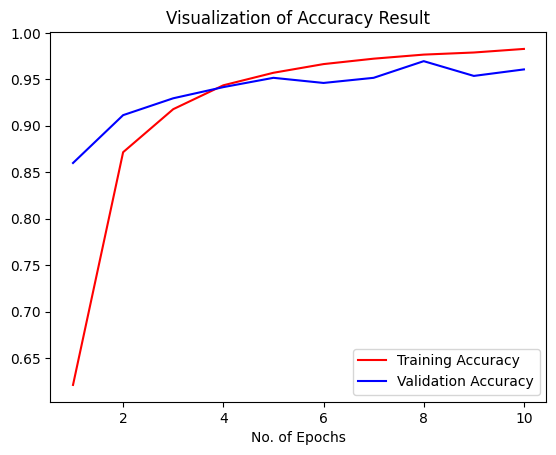

In [52]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()




OTHER METRICS FOR MODEL EVALUATION

In [53]:
class_name = validation_set.class_names

In [54]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [55]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 358s 20ms/step


In [56]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [57]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [58]:
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [62]:
# PRECISION , RECALL , F-SCORE
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.92      0.99      0.95       440
                                   Apple___healthy       0.98      0.90      0.94       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.98      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.82      0.98      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.85      0.



CONFUSION MATRIX VISUALIZATION

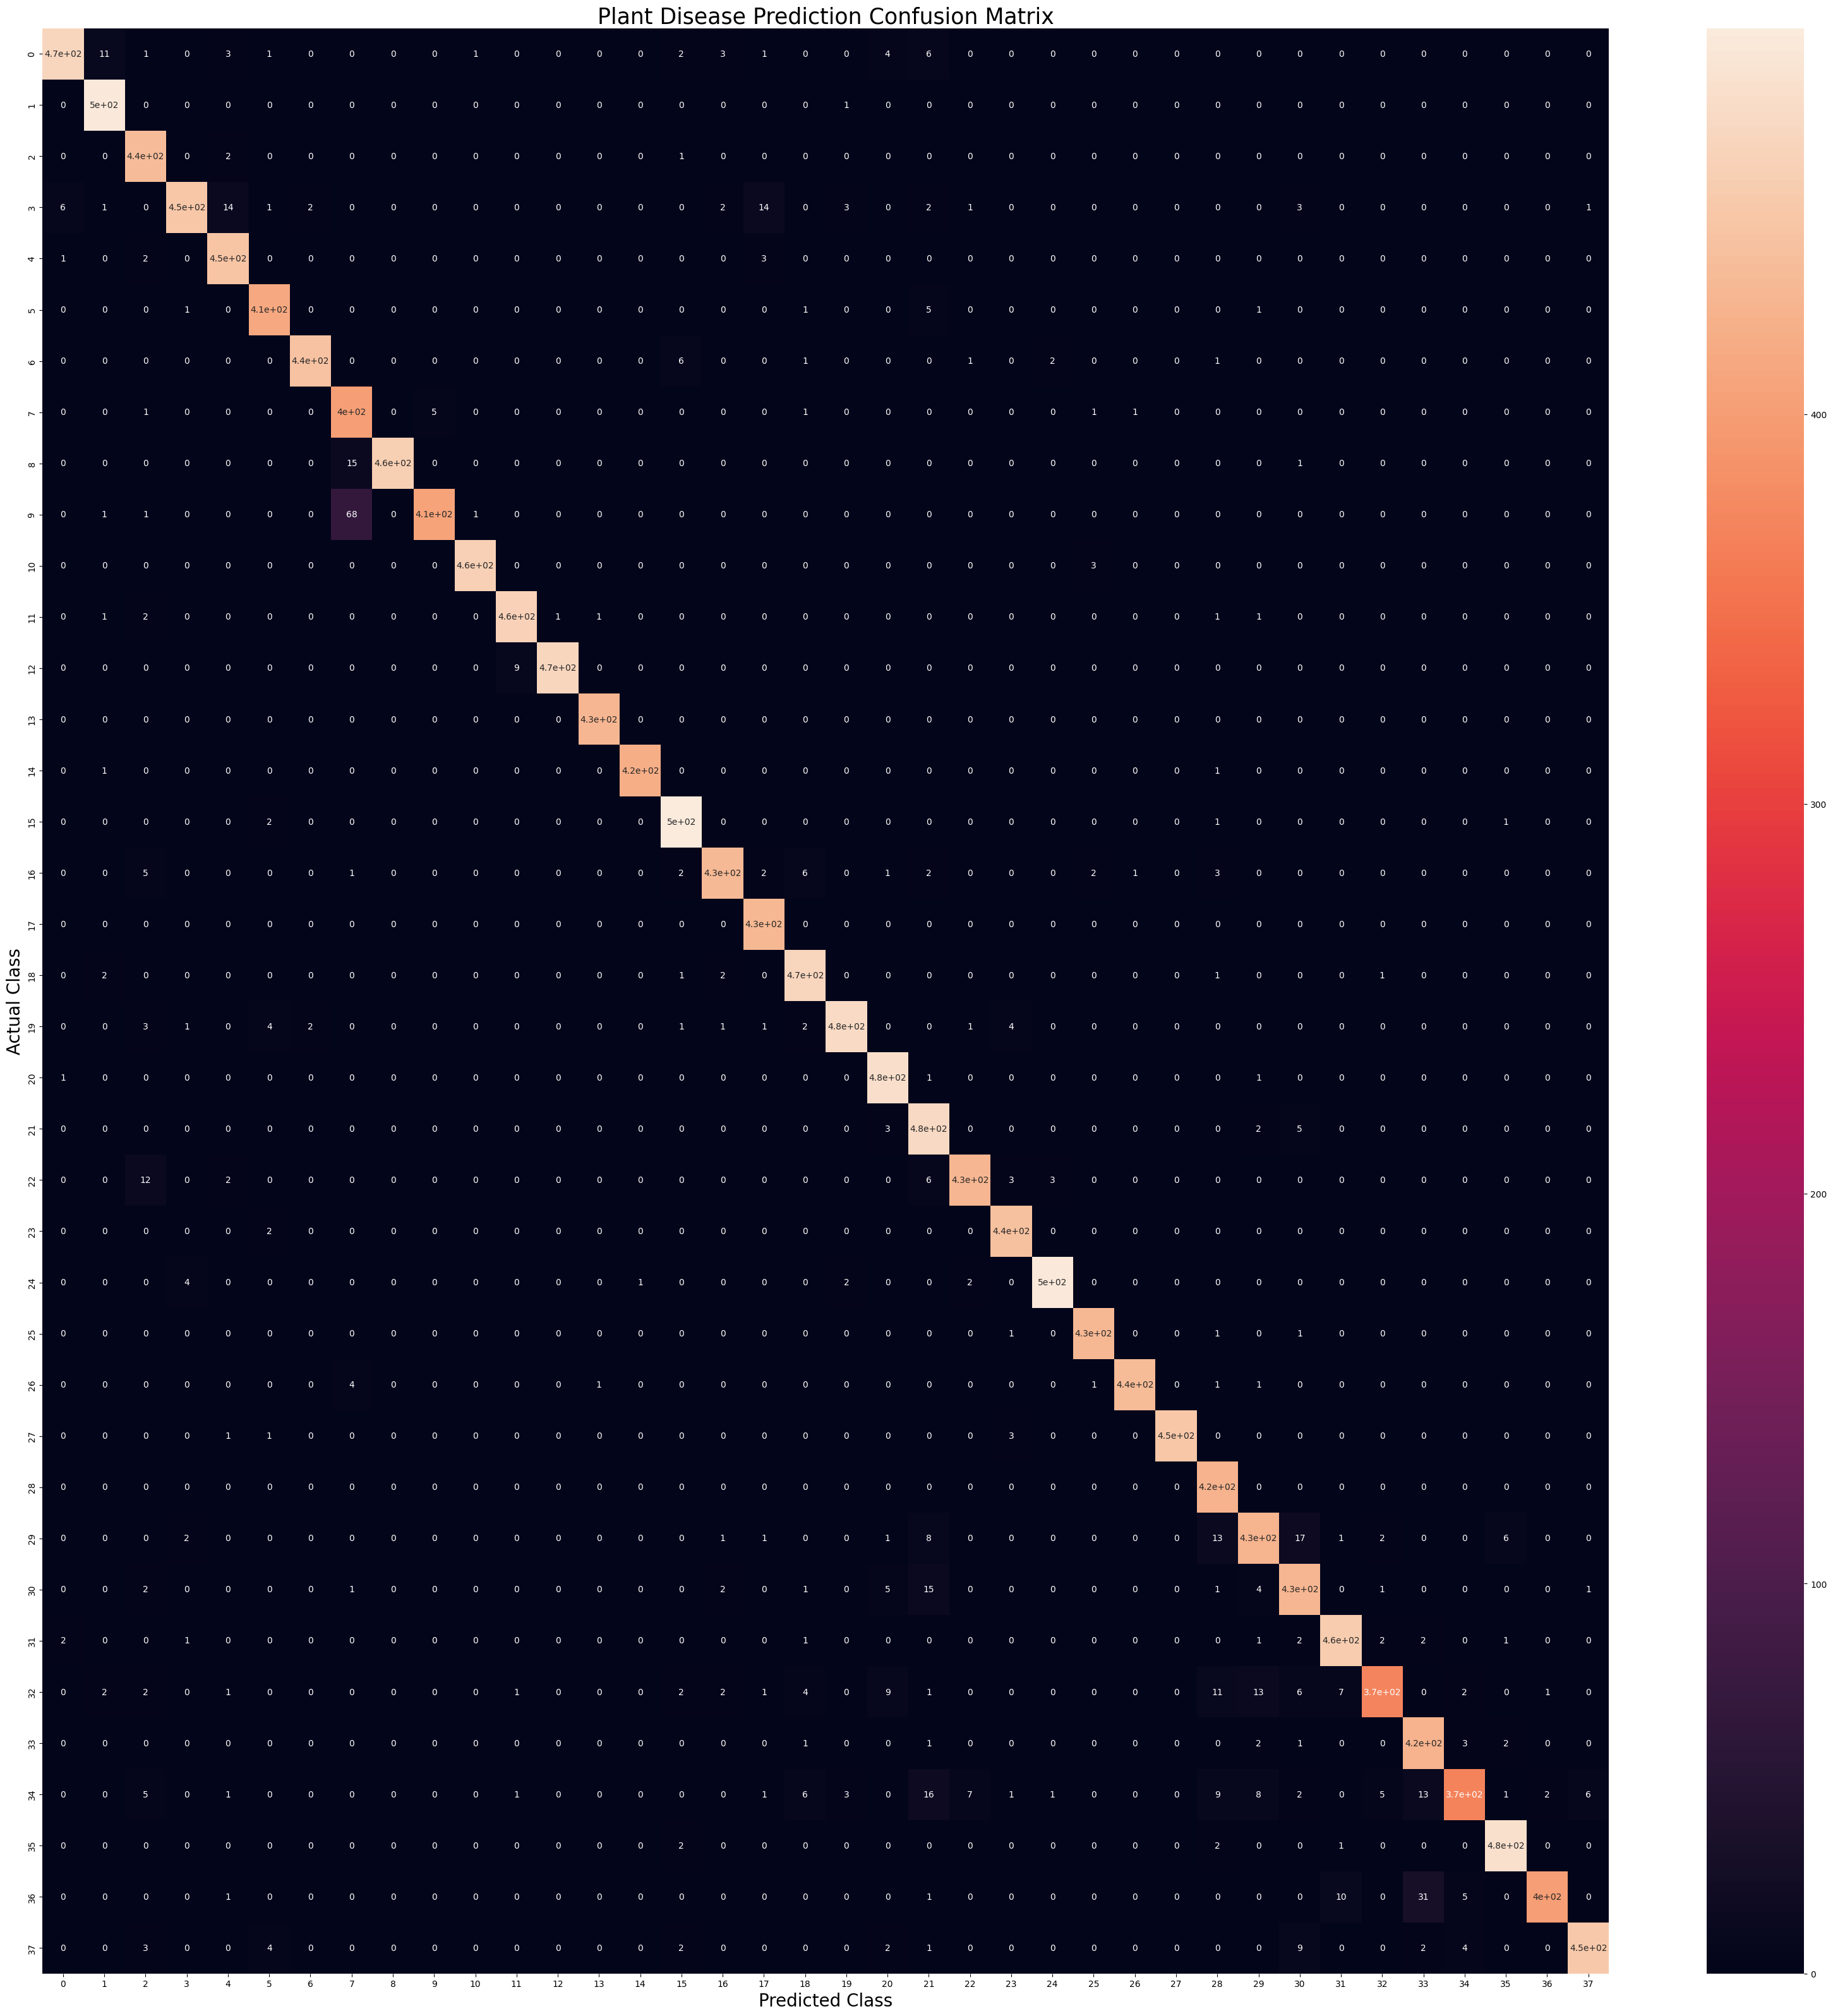

In [63]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()






TESTING THE MODEL 

Importing packages

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Test Set Image Processing

In [76]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

Loading Model

In [77]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

Visualising and Performing Prediction on Single image

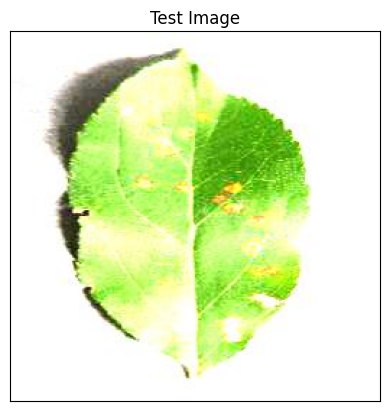

In [79]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [80]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


In [81]:
print(predictions)

[[8.38513913e-15 3.80767839e-14 1.00000000e+00 7.23919819e-17
  7.42601466e-12 8.23510978e-14 3.87311688e-18 2.64357140e-13
  2.11104537e-18 8.54979175e-18 3.00556237e-21 2.83654963e-13
  1.34542976e-14 4.68543595e-18 2.94667112e-17 2.57520496e-14
  1.71475735e-13 4.60402694e-16 4.91550431e-14 6.31826609e-15
  1.17509595e-16 7.95758585e-18 3.32830043e-14 7.68832833e-15
  1.20698853e-17 1.80850097e-16 1.57414530e-15 3.06405301e-17
  1.19165676e-11 7.88709223e-15 1.34051417e-14 1.88948142e-16
  5.78443882e-14 2.47268091e-17 1.02007446e-13 8.35047346e-15
  1.27054360e-15 7.58742733e-16]]


In [82]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


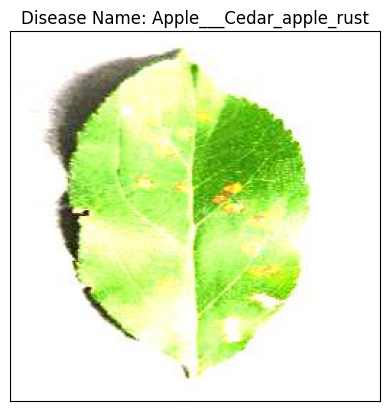

In [85]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()